# Validation of Nowicki Jessee (2017)

In this section, we demonstrate that our implementation of the Nowicki Jessee (2017) model yields the same output as results reported in the original paper. There may be slight differences due to different shakemap versions or minor differences in the exact colorbars used.

Note that the original Nowicki Jessee (2017) model outputs relative hazard (0 to 1), but we require a value with a clear statistical meaning so we used the transfer function proposed by Nowicki Jessee (2017) to convert the original model to areal coverage. Here we validate against relative hazard because the areal coverage output is not shown in any figures in the original publication.

## Loma Prieta earthquake



In [49]:
#stdlib imports
from configobj import ConfigObj
import os
import pprint
import matplotlib.cm as cm

#local imports
from gfail.godt import godt2008
from gfail.logisticmodel import LogisticModel
from gfail.conf import correct_config_filepaths
from gfail.utilities import parseConfigLayers, parseMapConfig
from gfail import makemaps

import warnings
warnings.filterwarnings('ignore')

homedir = os.path.join(os.path.expanduser('~'), 'SecondaryHazards') 

# Set up file paths
# Directory containing model inputs
datadir = os.path.join(homedir, 'Codes/model_inputs') #'data/model_inputs'

# Path to config files
configfileG = '../defaultconfigfiles/models/godt_2008.ini'
configfileZ = '../defaultconfigfiles/models/zhu_2015.ini'
configfileZ2 = '../defaultconfigfiles/models/zhu_2017_general.ini'
configfileJ = '../defaultconfigfiles/models/jessee_2017_relativehazard.ini'
mapconfig = '../defaultconfigfiles/defaultconfigfiles/mapconfig.ini'

# Path to shakemap .xml files
shakefile = 'data/shakemaps/lomaprieta.xml'

# Path to mapping inputs for static plots
map_inputs = os.path.join(homedir, 'Codes/mapping_inputs')#'data/mapping_inputs'

Populating the interactive namespace from numpy and matplotlib


In [50]:
# Read in the config file for this model. This contains all of the information needed to run the model
config = ConfigObj(configfileJ)

# append the data directory to the relative paths in the config file
config = correct_config_filepaths(datadir, config)
# View the config file
#pprint.pprint(config)


In [51]:
# Run the model (this will take a minute)
lmn = LogisticModel(shakefile, config, saveinputs=False)
maplayers = lmn.calculate()

Loading rock layer: 18.7 sec
Loading landcover layer: 17.8 sec
Loading slope layer: 36.9 sec
Loading cti layer: 4.4 sec


### Change bins to match figure from paper


In [52]:
lims = [[0., 0.1, 0.3, 0.5, 0.7, 0.9, 1.]]
#colorlist = ['#EFECEF','0E8C45', 'FBD705', 'F68A21', 'ED2128', '9A1C20']  #hex code for colors in figure below
colormap = [cm.RdYlGn_r]
bounds = dict(xmin=-124.5, xmax=-119.5, ymin=35, ymax=39)
maskthresh = [0.1]  # to represent gray color on figure

### Create the figure

No output location given, using current directory for outputs

Cutting failed, 'Input bounds must be completely contained by this grid.', continuing with full layers


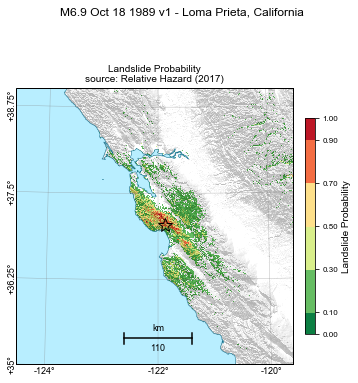

In [57]:
# read in general mapping preferences
mapconfig = ConfigObj(mapconfig)
kwargs = parseMapConfig(mapconfig, fileext=map_inputs)

# Make the figure
temp = makemaps.modelMap(maplayers, shakefile, lims=lims, maskthreshes=maskthresh, plotorder=['model'],
         logscale=False, maproads=False, mapcities=False, showplots=True, printparam=False,
         inventory_shapefile=None, scaletype='binned', savepdf=False, savepng=False, boundaries=bounds,
         colormaps=colormap, **kwargs)

### Compare to the result from the original paper for this event (below)
<img src="data/images/jessee2017_lomaprieta_relative.png" alt="From Paper" style="width: 400px;" align="left"/>

## Wenchuan earthquake

In [54]:
# Path to shakemap .xml files
shakefile2 = 'data/shakemaps/wenchuan.xml'

# Run the model (this will take a minute)
lmn2 = LogisticModel(shakefile2, config, saveinputs=False)
maplayers2 = lmn2.calculate()

Loading rock layer: 20.6 sec
Loading landcover layer: 14.1 sec
Loading slope layer: 33.3 sec
Loading cti layer: 5.4 sec


No output location given, using current directory for outputs



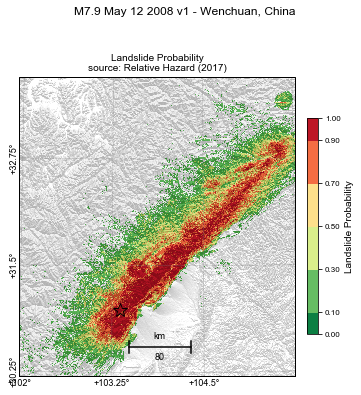

In [55]:
bounds2 = dict(xmin=102, xmax=105.8, ymin=30.2, ymax=33.7)

# Make the figure
temp = makemaps.modelMap(maplayers2, shakefile2, lims=lims, maskthreshes=maskthresh, plotorder=['model'],
         logscale=False, maproads=False, mapcities=False, showplots=True, printparam=False,
         inventory_shapefile=None, scaletype='binned', savepdf=False, savepng=False, boundaries=bounds2,
         colormaps=colormap, **kwargs)

### Compare to the result from the original paper for this event (below)
<img src="data/images/jessee2017_wenchuan_relative.png" alt="From Paper" style="width: 400px;" align="left"/>